Implementation of the Normalized Discounted Cumulative Gain (nDCG) at rank n.

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def dcg(relevance_scores, n=100):
    """
    Calculate DCG (Discounted Cumulative Gain) at rank n (only consider the top n documents).
    This involves summing the relevance scores of the results, discounted logarithmically by their position in the list.

    Returns DCG score for the top n documents.
    """
    relevance_scores = np.asarray(relevance_scores)[:n]
    if relevance_scores.size:
        return np.sum(relevance_scores / np.log2(np.arange(2, relevance_scores.size + 2)))
    return 0.0


def idcg(relevance_scores, n=100):
    """
    Calculate IDCG (Ideal Discounted Cumulative Gain) at rank n (only consider the top n documents).
    This is the DCG of the best possible ranking. In other words, the ground truth ranking.

    Returns IDCG score for the top n documents.
    """
    sorted_scores = sorted(relevance_scores, reverse=True)
    return dcg(sorted_scores, n)


def ndcg(relevance_scores: list[float], n=100):
    """
    
    """
    dcg_max = idcg(relevance_scores, n)
    if not dcg_max:
        return 0.0
    return dcg(relevance_scores, n) / dcg_max

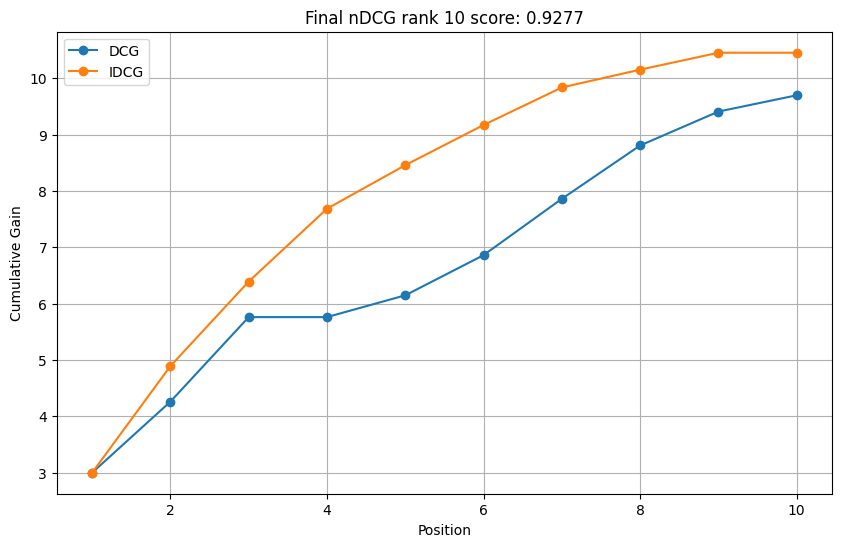

In [6]:
# Example
relevance_scores = [3, 2, 3, 0, 1, 2, 3, 3, 2, 1]
# relevance_scores = sorted(relevance_scores, reverse=True) # uncomment for optimal scoring. in other words: ndcg=1.0
n = 10

ndcg_10 = ndcg(relevance_scores, n)

positions = np.arange(1, n + 1)
dcg_values = [dcg(relevance_scores, i) for i in positions]
idcg_values = [idcg(relevance_scores, i) for i in positions]

plt.figure(figsize=(10, 6))
plt.plot(positions, dcg_values, label="DCG", marker="o")
plt.plot(positions, idcg_values, label="IDCG", marker="o")
plt.title(f"Final nDCG rank {n} score: {ndcg_10:.4f}")
plt.xlabel("Position")
plt.ylabel("Cumulative Gain")
plt.legend()
plt.grid(True)
plt.show()